Gamma distribution parameters: shape=11.679, loc=2.166, scale=0.117
KS test statistic: 0.010, p-value: 0.223


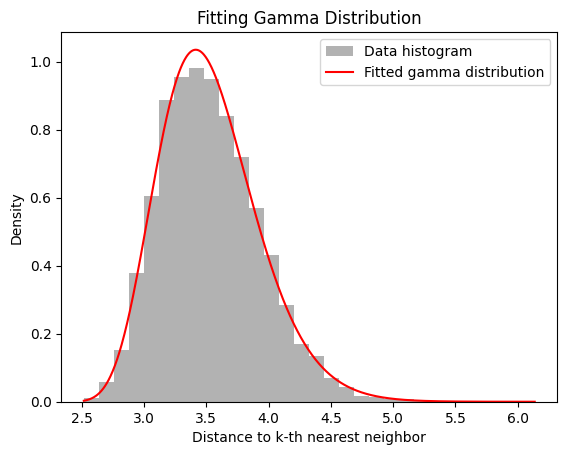

In [ ]:
import numpy as np
from scipy.spatial import KDTree
from scipy.stats import gamma, kstest
import matplotlib.pyplot as plt

# Parameters
num_points = 10000  # Number of points
dim = 20  # Dimensionality
k = 5  # k-th nearest neighbor

# Step 1: Generate 10-dimensional normal distribution
data = np.random.normal(size=(num_points, dim))

# Step 2: Compute distances to the k-th nearest neighbor
tree = KDTree(data)
distances, _ = tree.query(data, k=k+1)  # k+1 because the query includes the point itself
kth_distances = distances[:, k]

# Step 3: Fit a gamma distribution to the k-th neighbor distances
shape, loc, scale = gamma.fit(kth_distances)
fitted_gamma = gamma(shape, loc, scale)

# Step 4: Check the goodness of fit with Kolmogorov-Smirnov test
ks_stat, p_value = kstest(kth_distances, 'gamma', args=(shape, loc, scale))

# Print results
print(f"Gamma distribution parameters: shape={shape:.3f}, loc={loc:.3f}, scale={scale:.3f}")
print(f"KS test statistic: {ks_stat:.3f}, p-value: {p_value:.3f}")

# Plot the histogram and the fitted gamma distribution
plt.hist(kth_distances, bins=30, density=True, alpha=0.6, color='gray', label='Data histogram')
x = np.linspace(min(kth_distances), max(kth_distances), 1000)
plt.plot(x, fitted_gamma.pdf(x), 'r-', label='Fitted gamma distribution')
plt.xlabel('Distance to k-th nearest neighbor')
plt.ylabel('Density')
plt.legend()
plt.title('Fitting Gamma Distribution')
plt.show()


Distribution Fitness Comparison:
gamma: KS Statistic=0.008, p-value=0.934, Parameters=(np.float64(5.472050744419513), np.float64(1.0903842501174525), np.float64(0.14824831263105745))
lognormal: KS Statistic=0.012, p-value=0.413, Parameters=(np.float64(0.3039069668505549), 0.7789126863728627, np.float64(1.07223323712795))
weibull: KS Statistic=0.027, p-value=0.001, Parameters=(np.float64(2.214493397770328), np.float64(1.1775678419560247), np.float64(0.8185737789228976))
normal: KS Statistic=0.059, p-value=0.000, Parameters=(np.float64(1.9016066195371129), np.float64(0.3458225867899541))
exponential: KS Statistic=0.262, p-value=0.000, Parameters=(1.1791488280503148, 0.722457791486798)


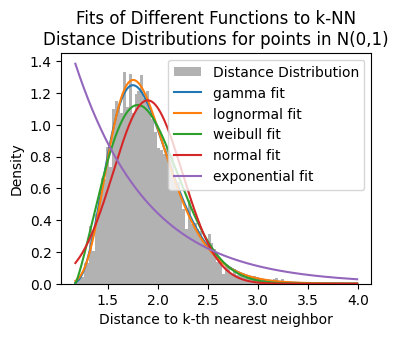

In [ ]:
import numpy as np
from scipy.spatial import KDTree
from scipy.stats import gamma, norm, expon, lognorm, weibull_min, kstest
import matplotlib.pyplot as plt

np.random.seed(100)


# Parameters
num_points = 5000  # Number of points
dim = 10  # Dimensionality
k = 5  # k-th nearest neighbor

# Step 1: Generate 10-dimensional normal distribution
data = np.random.normal(size=(num_points, dim))

# Step 2: Compute distances to the k-th nearest neighbor
tree = KDTree(data)
distances, _ = tree.query(data, k=k+1)  # k+1 because the query includes the point itself
kth_distances = distances[:, k]

# Step 3: Candidate distributions and fitting
distributions = {
    'gamma': gamma,
    'normal': norm,
    'exponential': expon,
    'lognormal': lognorm,
    'weibull': weibull_min
}

results = []

# Fit distributions and calculate KS statistics
for dist_name, dist in distributions.items():
    # Fit the distribution
    params = dist.fit(kth_distances)
    # Perform KS test using the distribution object
    ks_stat, p_value = kstest(kth_distances, dist.cdf, args=params)
    # Save results
    results.append((dist_name, ks_stat, p_value, params))

# Sort by KS statistic (lower is better)
results.sort(key=lambda x: x[1])

# Print results
print("Distribution Fitness Comparison:")
for dist_name, ks_stat, p_value, params in results:
    print(f"{dist_name}: KS Statistic={ks_stat:.3f}, p-value={p_value:.3f}, Parameters={params}")

# Step 4: Plot all fits
plt.figure(figsize=(4, 3))
plt.hist(kth_distances, bins=100, density=True, alpha=0.6, color='gray', label='Distance Distribution')

x = np.linspace(min(kth_distances), max(kth_distances), 1000)
for dist_name, _, _, params in results:
    dist = distributions[dist_name]
    plt.plot(x, dist.pdf(x, *params), label=f'{dist_name} fit')

plt.xlabel('Distance to k-th nearest neighbor')
plt.ylabel('Density')
plt.legend()
plt.title('Fits of Different Functions to k-NN\nDistance Distributions for points in N(0,1)')

plt.savefig("N01_dist.svg")

plt.show()


<ipython-input-14-53e7b9bc6805>:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ks_stats.values(), labels=ks_stats.keys(), showmeans=True)


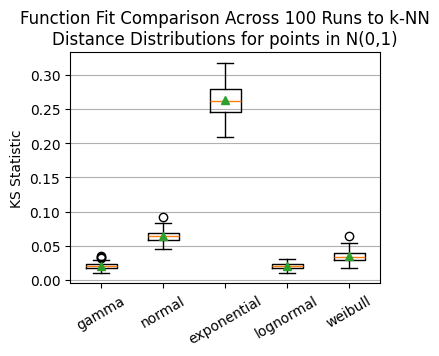

Best Distribution Based on Median KS Statistic:
gamma: Median KS Statistic = 0.020
lognormal: Median KS Statistic = 0.020
weibull: Median KS Statistic = 0.034
normal: Median KS Statistic = 0.065
exponential: Median KS Statistic = 0.262

Best Fit: gamma


In [ ]:
import numpy as np
from scipy.spatial import KDTree
from scipy.stats import gamma, norm, expon, lognorm, weibull_min, kstest
import matplotlib.pyplot as plt

np.random.seed(100)

# Parameters
num_points = 1000  # Number of points
dim = 10  # Dimensionality
k = 5  # k-th nearest neighbor
num_runs = 100  # Number of repetitions

# Candidate distributions
distributions = {
    'gamma': gamma,
    'normal': norm,
    'exponential': expon,
    'lognormal': lognorm,
    'weibull': weibull_min
}

# Store KS statistics for each run
ks_stats = {dist_name: [] for dist_name in distributions}

# Repeated runs
for _ in range(num_runs):
    # Step 1: Generate 10-dimensional normal distribution
    data = np.random.normal(size=(num_points, dim))

    # Step 2: Compute distances to the k-th nearest neighbor
    tree = KDTree(data)
    distances, _ = tree.query(data, k=k+1)  # k+1 because the query includes the point itself
    kth_distances = distances[:, k]

    # Step 3: Fit distributions and calculate KS statistics
    for dist_name, dist in distributions.items():
        # Fit the distribution
        params = dist.fit(kth_distances)
        # Perform KS test using the distribution object
        ks_stat, _ = kstest(kth_distances, dist.cdf, args=params)
        # Store the KS statistic
        ks_stats[dist_name].append(ks_stat)

# Plot boxplots of KS statistics
plt.figure(figsize=(4, 3))
plt.boxplot(ks_stats.values(), labels=ks_stats.keys(), showmeans=True)
plt.ylabel('KS Statistic')
plt.title('Function Fit Comparison Across 100 Runs to k-NN\nDistance Distributions for points in N(0,1)')
plt.xticks(rotation=30)
plt.grid(axis='y')

plt.savefig('N01_boxplot.svg')

plt.show()

# Determine the best distribution (lowest median KS statistic)
median_ks_stats = {dist: np.median(stats) for dist, stats in ks_stats.items()}
best_fit = min(median_ks_stats, key=median_ks_stats.get)

print("Best Distribution Based on Median KS Statistic:")
for dist, median in sorted(median_ks_stats.items(), key=lambda x: x[1]):
    print(f"{dist}: Median KS Statistic = {median:.3f}")
print(f"\nBest Fit: {best_fit}")


Distribution Fitness Comparison:
lognormal: KS Statistic=0.014, p-value=0.313, Parameters=(np.float64(0.5143907754702304), 1.278241364096293, np.float64(1.3083250730954614))
gamma: KS Statistic=0.043, p-value=0.000, Parameters=(np.float64(3.200368817393155), np.float64(1.3965763945375476), np.float64(0.4308776755303312))
weibull: KS Statistic=0.062, p-value=0.000, Parameters=(np.float64(1.7255159763488837), np.float64(1.4049938950381864), np.float64(1.5465332658237236))
normal: KS Statistic=0.117, p-value=0.000, Parameters=(np.float64(2.7755379724781504), np.float64(0.8644450087434364))
exponential: KS Statistic=0.238, p-value=0.000, Parameters=(1.406156643555324, 1.3693813289228263)


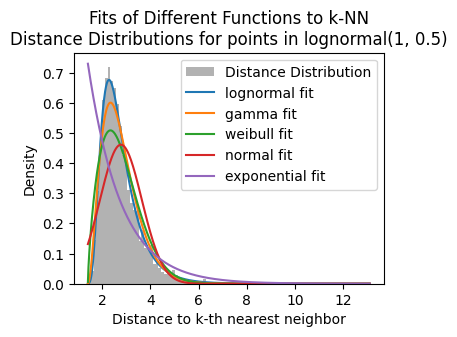

In [ ]:
import numpy as np
from scipy.spatial import KDTree
from scipy.stats import gamma, norm, expon, lognorm, weibull_min, kstest
import matplotlib.pyplot as plt

np.random.seed(100)


# Parameters
num_points = 5000  # Number of points
dim = 10  # Dimensionality
k = 5  # k-th nearest neighbor

# Step 1: Generate 10-dimensional normal distribution
data = np.random.lognormal(mean=1, sigma=.5, size=(num_points, dim))  # Skewed data

# Step 2: Compute distances to the k-th nearest neighbor
tree = KDTree(data)
distances, _ = tree.query(data, k=k+1)  # k+1 because the query includes the point itself
kth_distances = distances[:, k]

# Step 3: Candidate distributions and fitting
distributions = {
    'gamma': gamma,
    'normal': norm,
    'exponential': expon,
    'lognormal': lognorm,
    'weibull': weibull_min
}

results = []

# Fit distributions and calculate KS statistics
for dist_name, dist in distributions.items():
    # Fit the distribution
    params = dist.fit(kth_distances)
    # Perform KS test using the distribution object
    ks_stat, p_value = kstest(kth_distances, dist.cdf, args=params)
    # Save results
    results.append((dist_name, ks_stat, p_value, params))

# Sort by KS statistic (lower is better)
results.sort(key=lambda x: x[1])

# Print results
print("Distribution Fitness Comparison:")
for dist_name, ks_stat, p_value, params in results:
    print(f"{dist_name}: KS Statistic={ks_stat:.3f}, p-value={p_value:.3f}, Parameters={params}")

# Step 4: Plot all fits
plt.figure(figsize=(4, 3))
plt.hist(kth_distances, bins=100, density=True, alpha=0.6, color='gray', label='Distance Distribution')

x = np.linspace(min(kth_distances), max(kth_distances), 1000)
for dist_name, _, _, params in results:
    dist = distributions[dist_name]
    plt.plot(x, dist.pdf(x, *params), label=f'{dist_name} fit')

plt.xlabel('Distance to k-th nearest neighbor')
plt.ylabel('Density')
plt.legend()
plt.title('Fits of Different Functions to k-NN\nDistance Distributions for points in lognormal(1, 0.5)')
plt.savefig('lognorm_dist.svg')
plt.show()


Best Distribution Based on Median KS Statistic for Skewed Data:
lognormal: Median KS Statistic = 0.012
gamma: Median KS Statistic = 0.039
weibull: Median KS Statistic = 0.062
normal: Median KS Statistic = 0.116
exponential: Median KS Statistic = 0.227

Best Fit: lognormal


<ipython-input-16-f4c0725536c2>:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ks_stats.values(), labels=ks_stats.keys(), showmeans=True)


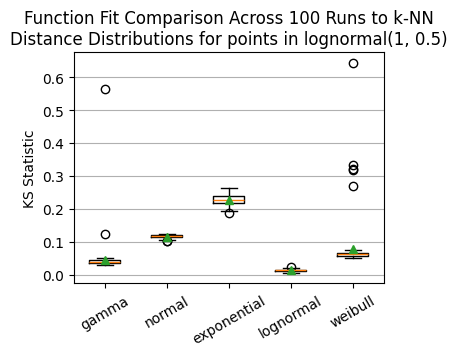

In [ ]:
import numpy as np
from scipy.spatial import KDTree
from scipy.stats import gamma, norm, expon, lognorm, weibull_min, kstest
import matplotlib.pyplot as plt

np.random.seed(100)

# Parameters
num_points = 5000  # Number of points
dim = 10  # Dimensionality
k = 5  # k-th nearest neighbor
num_runs = 100  # Number of repetitions

# Candidate distributions
distributions = {
    'gamma': gamma,
    'normal': norm,
    'exponential': expon,
    'lognormal': lognorm,
    'weibull': weibull_min
}

# Store KS statistics for each run
ks_stats = {dist_name: [] for dist_name in distributions}

# Repeated runs
for _ in range(num_runs):
    # Step 1: Generate skewed data using a lognormal distribution (for skewness)
    data = np.random.lognormal(mean=1, sigma=.5, size=(num_points, dim))  # Skewed data

    # Step 2: Compute distances to the k-th nearest neighbor
    tree = KDTree(data)
    distances, _ = tree.query(data, k=k+1)  # k+1 because the query includes the point itself
    kth_distances = distances[:, k]

    # Step 3: Fit distributions and calculate KS statistics
    for dist_name, dist in distributions.items():
        # Fit the distribution
        params = dist.fit(kth_distances)
        # Perform KS test using the distribution object
        ks_stat, _ = kstest(kth_distances, dist.cdf, args=params)
        # Store the KS statistic
        ks_stats[dist_name].append(ks_stat)

# Plot boxplots of KS statistics
plt.figure(figsize=(4, 3))
plt.boxplot(ks_stats.values(), labels=ks_stats.keys(), showmeans=True)
plt.ylabel('KS Statistic')
plt.title('Function Fit Comparison Across 100 Runs to k-NN\nDistance Distributions for points in lognormal(1, 0.5)')
plt.xticks(rotation=30)
plt.grid(axis='y')

plt.savefig('lognorm_boxplot.svg')

# Determine the best distribution (lowest median KS statistic)
median_ks_stats = {dist: np.median(stats) for dist, stats in ks_stats.items()}
best_fit = min(median_ks_stats, key=median_ks_stats.get)

print("Best Distribution Based on Median KS Statistic for Skewed Data:")
for dist, median in sorted(median_ks_stats.items(), key=lambda x: x[1]):
    print(f"{dist}: Median KS Statistic = {median:.3f}")
print(f"\nBest Fit: {best_fit}")


Distribution Fitness Comparison:
lognormal: KS Statistic=0.009, p-value=0.853, Parameters=(0.5299007896300936, 1.3191915425985048, 1.2549460324646555)
gamma: KS Statistic=0.036, p-value=0.000, Parameters=(2.971110481686046, 1.4489223815639145, 0.4428278664454373)
weibull: KS Statistic=0.056, p-value=0.000, Parameters=(1.7027624109648896, 1.4527930105579436, 1.4792371526688863)
normal: KS Statistic=0.110, p-value=0.000, Parameters=(2.7646069526252566, 0.8352595176334503)
exponential: KS Statistic=0.220, p-value=0.000, Parameters=(1.45337426354031, 1.3112326890849466)


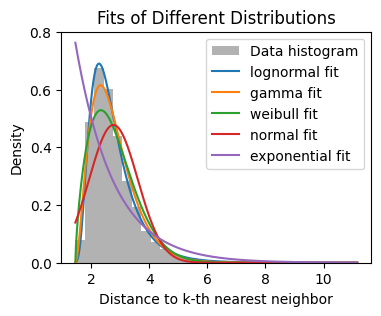

In [ ]:
import numpy as np
from scipy.spatial import KDTree
from scipy.stats import gamma, norm, expon, lognorm, weibull_min, kstest
import matplotlib.pyplot as plt

# Parameters
num_points = 5000  # Number of points
dim = 10  # Dimensionality
k = 5  # k-th nearest neighbor

# Step 1: Generate 10-dimensional normal distribution
data = np.random.lognormal(mean=1, sigma=.5, size=(num_points, dim))  # Skewed data

# Step 2: Compute distances to the k-th nearest neighbor
tree = KDTree(data)
distances, _ = tree.query(data, k=k+1)  # k+1 because the query includes the point itself
kth_distances = distances[:, k]

# Step 3: Candidate distributions and fitting
distributions = {
    'gamma': gamma,
    'normal': norm,
    'exponential': expon,
    'lognormal': lognorm,
    'weibull': weibull_min
}

results = []

# Fit distributions and calculate KS statistics
for dist_name, dist in distributions.items():
    # Fit the distribution
    params = dist.fit(kth_distances)
    # Perform KS test using the distribution object
    ks_stat, p_value = kstest(kth_distances, dist.cdf, args=params)
    # Save results
    results.append((dist_name, ks_stat, p_value, params))

# Sort by KS statistic (lower is better)
results.sort(key=lambda x: x[1])

# Print results
print("Distribution Fitness Comparison:")
for dist_name, ks_stat, p_value, params in results:
    print(f"{dist_name}: KS Statistic={ks_stat:.3f}, p-value={p_value:.3f}, Parameters={params}")

# Step 4: Plot all fits
plt.figure(figsize=(4, 3))
plt.hist(kth_distances, bins=30, density=True, alpha=0.6, color='gray', label='Data histogram')

x = np.linspace(min(kth_distances), max(kth_distances), 1000)
for dist_name, _, _, params in results:
    dist = distributions[dist_name]
    plt.plot(x, dist.pdf(x, *params), label=f'{dist_name} fit')

plt.xlabel('Distance to k-th nearest neighbor')
plt.ylabel('Density')
plt.legend()
plt.title('Fits of Different Distributions')
plt.show()


Distribution Fitness Comparison:
gamma: KS Statistic=0.009, p-value=0.815, Parameters=(np.float64(5.091307615294939), np.float64(4.554511514415525), np.float64(0.5998161540834228))
lognormal: KS Statistic=0.013, p-value=0.329, Parameters=(np.float64(0.32651530650223987), 3.525299889824048, np.float64(3.871847768081299))
weibull: KS Statistic=0.032, p-value=0.000, Parameters=(np.float64(2.1287286696441963), np.float64(4.868158930158454), np.float64(3.0979530051277058))
normal: KS Statistic=0.066, p-value=0.000, Parameters=(np.float64(7.608360490483322), np.float64(1.3576673307635494))
exponential: KS Statistic=0.254, p-value=0.000, Parameters=(4.879298440446184, 2.729062050037138)


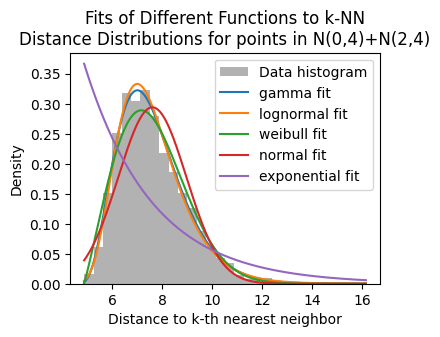

In [ ]:
import numpy as np
from scipy.spatial import KDTree
from scipy.stats import gamma, norm, expon, lognorm, weibull_min, kstest
import matplotlib.pyplot as plt

np.random.seed(100)

# Parameters
num_points = 5000  # Number of points
dim = 10  # Dimensionality
k = 5  # k-th nearest neighbor

# Step 1: Generate 10-dimensional normal distribution
mean1, std1 = 0, 4  # First normal distribution
mean2, std2 = 2, 4  # Second normal distribution
data1 = np.random.normal(mean1, std1, size=(num_points, dim // 2))  # First cluster
data2 = np.random.normal(mean2, std2, size=(num_points, dim // 2))  # Second cluster
data = np.hstack([data1, data2])  # Combine the clusters to create bimodal data

# Step 2: Compute distances to the k-th nearest neighbor
tree = KDTree(data)
distances, _ = tree.query(data, k=k+1)  # k+1 because the query includes the point itself
kth_distances = distances[:, k]

# Step 3: Candidate distributions and fitting
distributions = {
    'gamma': gamma,
    'normal': norm,
    'exponential': expon,
    'lognormal': lognorm,
    'weibull': weibull_min
}

results = []

# Fit distributions and calculate KS statistics
for dist_name, dist in distributions.items():
    # Fit the distribution
    params = dist.fit(kth_distances)
    # Perform KS test using the distribution object
    ks_stat, p_value = kstest(kth_distances, dist.cdf, args=params)
    # Save results
    results.append((dist_name, ks_stat, p_value, params))

# Sort by KS statistic (lower is better)
results.sort(key=lambda x: x[1])

# Print results
print("Distribution Fitness Comparison:")
for dist_name, ks_stat, p_value, params in results:
    print(f"{dist_name}: KS Statistic={ks_stat:.3f}, p-value={p_value:.3f}, Parameters={params}")

# Step 4: Plot all fits
plt.figure(figsize=(4, 3))
plt.hist(kth_distances, bins=30, density=True, alpha=0.6, color='gray', label='Data histogram')

x = np.linspace(min(kth_distances), max(kth_distances), 1000)
for dist_name, _, _, params in results:
    dist = distributions[dist_name]
    plt.plot(x, dist.pdf(x, *params), label=f'{dist_name} fit')

plt.xlabel('Distance to k-th nearest neighbor')
plt.ylabel('Density')
plt.legend()
plt.title('Fits of Different Functions to k-NN\nDistance Distributions for points in N(0,4)+N(2,4)')
plt.savefig('N04_N24_dist.svg')
plt.show()


Best Distribution Based on Median KS Statistic for Bimodal Data:
lognormal: Median KS Statistic = 0.011
gamma: Median KS Statistic = 0.011
weibull: Median KS Statistic = 0.037
normal: Median KS Statistic = 0.065
exponential: Median KS Statistic = 0.276

Best Fit: lognormal


<ipython-input-18-909e0415e3ad>:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ks_stats.values(), labels=ks_stats.keys(), showmeans=True)


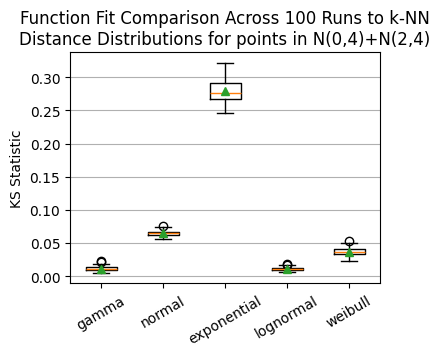

In [ ]:
import numpy as np
from scipy.spatial import KDTree
from scipy.stats import gamma, norm, expon, lognorm, weibull_min, kstest
import matplotlib.pyplot as plt

np.random.seed(100)

# Parameters
num_points = 5000  # Number of points
dim = 10  # Dimensionality
k = 5  # k-th nearest neighbor
num_runs = 100  # Number of repetitions

# Candidate distributions
distributions = {
    'gamma': gamma,
    'normal': norm,
    'exponential': expon,
    'lognormal': lognorm,
    'weibull': weibull_min
}

# Store KS statistics for each run
ks_stats = {dist_name: [] for dist_name in distributions}

# Repeated runs for bimodal data
for _ in range(num_runs):
    # Step 1: Generate bimodal normal data by mixing two normal distributions
    mean1, std1 = 0, 4  # First normal distribution
    mean2, std2 = 2, 4  # Second normal distribution
    data1 = np.random.normal(mean1, std1, size=(num_points, dim // 2))  # First cluster
    data2 = np.random.normal(mean2, std2, size=(num_points, dim // 2))  # Second cluster
    data = np.hstack([data1, data2])  # Combine the clusters to create bimodal data

    # Step 2: Compute distances to the k-th nearest neighbor
    tree = KDTree(data)
    distances, _ = tree.query(data, k=k+1)  # k+1 because the query includes the point itself
    kth_distances = distances[:, k]

    # Step 3: Fit distributions and calculate KS statistics
    for dist_name, dist in distributions.items():
        # Fit the distribution
        params = dist.fit(kth_distances)
        # Perform KS test using the distribution object
        ks_stat, _ = kstest(kth_distances, dist.cdf, args=params)
        # Store the KS statistic
        ks_stats[dist_name].append(ks_stat)

# Plot boxplots of KS statistics
plt.figure(figsize=(4, 3))
plt.boxplot(ks_stats.values(), labels=ks_stats.keys(), showmeans=True)
plt.ylabel('KS Statistic')
plt.title('Function Fit Comparison Across 100 Runs to k-NN\nDistance Distributions for points in N(0,4)+N(2,4)')
plt.xticks(rotation=30)
plt.grid(axis='y')

plt.savefig('N04_N24_boxplot.svg')

# Determine the best distribution (lowest median KS statistic)
median_ks_stats = {dist: np.median(stats) for dist, stats in ks_stats.items()}
best_fit = min(median_ks_stats, key=median_ks_stats.get)

print("Best Distribution Based on Median KS Statistic for Bimodal Data:")
for dist, median in sorted(median_ks_stats.items(), key=lambda x: x[1]):
    print(f"{dist}: Median KS Statistic = {median:.3f}")
print(f"\nBest Fit: {best_fit}")


## Real data

In [ ]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 118.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import scanpy as sc
import pandas as pd

In [ ]:
ROOT_PATH = '/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/data/Infracted Heart Border Zone - GSE214611_RAW'

In [ ]:
PROBLEM_KEY = 'ref_0_que_1-7'

In [ ]:
metadata_sc = pd.read_csv(f'{ROOT_PATH}/Single-Cell-Spatial-Transcriptomics-for-Border-zone/sn_wc_object_integrated@meta.data.csv', index_col=0)
metadata_sc_t = metadata_sc.rename(index=lambda x: x.split('_')[0])
metadata_sc_t['obs_names'] = metadata_sc_t.index

In [ ]:
def get_anndata(mtx_path_id, metadata_orig_id):
    PATH = f'{ROOT_PATH}/{mtx_path_id}'
    ad = sc.read_10x_mtx(PATH)
    ad.obs = ad.obs.rename(index=lambda x: x.split('-')[0])
    A = metadata_sc_t[metadata_sc_t['orig.ident'] == metadata_orig_id]

    ad.obs = ad.obs.merge(A, left_index=True, right_index=True, how='left')

    return ad

In [ ]:
def pp_anndata(ad, n_top_genes=None, plot=False):
    ad.var_names_make_unique()

    sc.pp.filter_cells(ad, min_genes=200)
    sc.pp.filter_genes(ad, min_cells=3)

    ad.var['mt'] = ad.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(ad, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    if plot:
        sc.pl.violin(ad, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
                jitter=0.4, multi_panel=True)
        sc.pl.scatter(ad, x='total_counts', y='pct_counts_mt')
        sc.pl.scatter(ad, x='total_counts', y='n_genes_by_counts')

    # ad = ad[ad.obs.n_genes_by_counts < 6000, :]
    ad = ad[ad.obs.pct_counts_mt <= 5, :]

    sc.pp.normalize_total(ad, target_sum=1e4)
    sc.pp.log1p(ad)

    if n_top_genes is not None:
        sc.pp.highly_variable_genes(ad, n_top_genes=n_top_genes)
        ad.raw = ad
        ad = ad[:, ad.var.highly_variable]

    if plot:
        sc.pl.highly_variable_genes(ad)

    # sc.pp.regress_out(ad, ['total_counts', 'pct_counts_mt'])
    # sc.pp.scale(ad, max_value=10)

    return ad

In [ ]:
healthy_celltypes = ['Myh6']
disease_celltypes = ['Ankrd1', 'Xirp2']
imp_celltypes = disease_celltypes + healthy_celltypes

In [ ]:
def get_mtx_path_id_metadata_orig_id(problem_key):
    exp_meta_keys = {
        'ref_0_que_1hr': {
            'ref': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'que': [
                ('sn1hr_1', 'sn1_1'),
                ('sn1hr_2', 'sn1_2'),
            ]
        },
        'ref_0_que_4hr': {
            'ref': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'que': [
                ('sn4hr', '4HR'),
            ]
        },
        'ref_0_que_1': {
            'ref': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'que': [
                ('snd1_1', 'D1_MI'),
                ('snd1_2', 'D1_MI_Hrt_nuclei'),
                ('snd1_3', 'D1_IR30_Hrt_nuclei'),
                ('snd1_4', 'WT_IR30_D1_2'),
                ('snd1_5', 'WT_IR30_D1_3'),
            ]
        },
        'ref_0_que_3': {
            'ref': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'que': [
                ('snd3_1', 'WT_IR30_D3'),
                ('snd3_2', 'D3F_M_rep1'),
                ('snd3_3', 'D3F_M_rep2'),
            ]
        },
        'ref_0_que_7': {
            'ref': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'que': [
                ('snd7_1', 'snD7_1'),
                ('snd7_2', 'snD7_1'),
                ('snd7_3', 'D5_D7'),
            ]
        },
        'ref_0_que_1-7': {
            'ref': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'que': [
                ('sn1hr_1', 'sn1_1'),
                ('sn1hr_2', 'sn1_2'),
                ('sn4hr', '4HR'),
                ('snd1_1', 'D1_MI'),
                ('snd1_2', 'D1_MI_Hrt_nuclei'),
                ('snd1_3', 'D1_IR30_Hrt_nuclei'),
                ('snd1_4', 'WT_IR30_D1_2'),
                ('snd1_5', 'WT_IR30_D1_3'),
                ('snd3_1', 'WT_IR30_D3'),
                ('snd3_2', 'D3F_M_rep1'),
                ('snd3_3', 'D3F_M_rep2'),
                ('snd7_1', 'snD7_1'),
                ('snd7_2', 'snD7_1'),
                ('snd7_3', 'D5_D7'),
            ]
        }
    }

    return exp_meta_keys[problem_key]

In [ ]:
exp_meta_keys = get_mtx_path_id_metadata_orig_id(PROBLEM_KEY)

In [ ]:
import anndata as AD

adatas = {}

for key, item in exp_meta_keys.items():
    for i, (mtx_path_id, metadata_orig_id) in enumerate(item):
        ad = pp_anndata(get_anndata(mtx_path_id, metadata_orig_id))
        ad = ad[ad.obs['final_cluster'].isin(imp_celltypes)]
        dataset_id = f"{key}_{i+1}"
        ad.obs['dataset'] = dataset_id
        ad.obs['datagroup'] = key
        adatas[f"{key}_{i+1}"] = ad

adatas

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
<ipython-input-29-3ce33b34eb0e>:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs['dataset'] = dataset_id
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
<ipython-input-29-3ce33b34eb0e>:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs['dataset'] = dataset_id
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
<ipython-input-29-3ce33b34eb0e>:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs['dataset'] = 

{'ref_1': AnnData object with n_obs × n_vars = 1390 × 17676
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.6', 'original', 'sample', 'integrated_snn_res.1.2', 'final_cluster', 'orig_id', 'sample_id', 'neworig', 'orig_id2', 'percent.mt', 'total', 'obs_names', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'datagroup'
     var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
     uns: 'log1p',
 'ref_2': AnnData object with n_obs × n_vars = 1390 × 20456
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.6', 'original', 'sample', 'integrated_snn_res.1.2', 'final_cluster', 'orig_id', 'sample_id', 'neworig', 'orig_id2', 'percent.mt', 'total', 'obs_names', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_coun

In [ ]:
ad = AD.concat(adatas, label='batch_key')
ad.obs_names_make_unique()
ad

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 14779 × 1426
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.6', 'original', 'sample', 'integrated_snn_res.1.2', 'final_cluster', 'orig_id', 'sample_id', 'neworig', 'orig_id2', 'percent.mt', 'total', 'obs_names', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'datagroup', 'batch_key'

In [ ]:
sc.tl.pca(ad)

In [ ]:
ad_ref = ad[ad.obs['datagroup'].isin(['ref'])]

In [ ]:
X_ref = ad_ref.obsm['X_pca']

In [ ]:
X_ref.shape

(3304, 50)

Distribution Fitness Comparison: dim=4
lognormal: KS Statistic=0.014, p-value=0.507, Parameters=(np.float64(0.5709731073908825), 0.24257810090523957, np.float64(0.7181861981008476))
weibull: KS Statistic=0.059, p-value=0.000, Parameters=(np.float64(1.5314510670079797), np.float64(0.3177074060043691), np.float64(0.8645179766224284))
normal: KS Statistic=0.127, p-value=0.000, Parameters=(np.float64(1.0908000158902882), np.float64(0.5689361963109647))
exponential: KS Statistic=0.197, p-value=0.000, Parameters=(0.3180417747176001, 0.7727582411726881)
gamma: KS Statistic=0.245, p-value=0.000, Parameters=(np.float64(0.5990167129130599), np.float64(0.31804177471760003), np.float64(2.4139290558514324))
Distribution Fitness Comparison: dim=5
lognormal: KS Statistic=0.012, p-value=0.691, Parameters=(np.float64(0.5530571218505819), 0.3822012698709573, np.float64(0.9520945099613962))
gamma: KS Statistic=0.027, p-value=0.019, Parameters=(np.float64(2.532398879221164), np.float64(0.5098700071624527)

<ipython-input-36-97c63eb0b3d6>:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ks_statistics[dist_name] for dist_name in distributions.keys()],


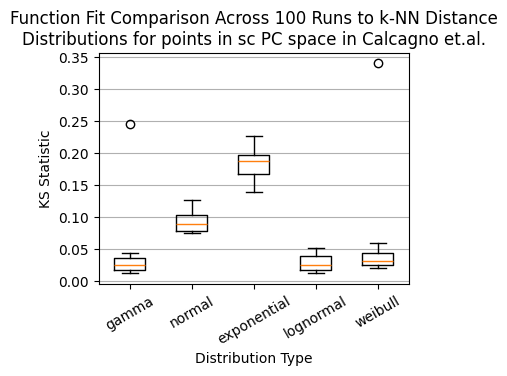

In [ ]:
import numpy as np
from scipy.spatial import KDTree
from scipy.stats import gamma, norm, expon, lognorm, weibull_min, kstest
import matplotlib.pyplot as plt

# Assuming X_ref is defined (randomly generating here for example purposes)
np.random.seed(100)  # For reproducibility
k = 5  # k-th nearest neighbor

# Candidate distributions
distributions = {
    'gamma': gamma,
    'normal': norm,
    'exponential': expon,
    'lognormal': lognorm,
    'weibull': weibull_min
}

# Storage for KS statistics over dimensions
ks_statistics = {dist_name: [] for dist_name in distributions.keys()}

# Loop through dimensions
for dim in range(4, 21):
    data = X_ref[:, :dim]  # Use the first `dim` dimensions
    tree = KDTree(data)
    distances, _ = tree.query(data, k=k+1)  # k+1 to exclude the point itself
    kth_distances = distances[:, k]  # k-th nearest neighbor distances

    results = []

    # Calculate KS statistics for each distribution
    for dist_name, dist in distributions.items():
        params = dist.fit(kth_distances)
        ks_stat, p_value = kstest(kth_distances, dist.cdf, args=params)
        ks_statistics[dist_name].append(ks_stat)
        results.append((dist_name, ks_stat, p_value, params))

    # Sort by KS statistic (lower is better)
    results.sort(key=lambda x: x[1])

    # Print results
    print(f"Distribution Fitness Comparison: dim={dim}")
    for dist_name, ks_stat, p_value, params in results:
        print(f"{dist_name}: KS Statistic={ks_stat:.3f}, p-value={p_value:.3f}, Parameters={params}")

    # Step 4: Plot all fits
    plt.figure(figsize=(4, 3))
    plt.hist(kth_distances, bins=100, density=True, alpha=0.6, color='gray', label='Distance Distribution')

    x = np.linspace(min(kth_distances), max(kth_distances), 1000)
    for dist_name, _, _, params in results:
        dist = distributions[dist_name]
        plt.plot(x, dist.pdf(x, *params), label=f'{dist_name} fit')

    plt.xlabel('Distance to k-th nearest neighbor')
    plt.ylabel('Density')
    plt.legend()
    plt.title('Fits of Different Functions to k-NN Distance\nDistributions for points in sc PC space in Calcagno et.al.')
    plt.savefig(f'Calcagno_dist_PC_{dim}.svg')

    plt.close()

# Step 5: Plot the results
plt.figure(figsize=(4, 3))
plt.boxplot([ks_statistics[dist_name] for dist_name in distributions.keys()],
            labels=distributions.keys())
plt.xlabel('Distribution Type')
plt.ylabel('KS Statistic')
plt.title('Function Fit Comparison Across 100 Runs to k-NN Distance\nDistributions for points in sc PC space in Calcagno et.al.')
plt.xticks(rotation=30)
plt.grid(axis='y')

plt.savefig('Calcagno_boxplot.svg')

# Display KS statistics over dimensions
for dist_name, stats in ks_statistics.items():
    print(f"{dist_name}: Mean KS Statistic over dimensions = {np.mean(stats):.3f}")

## Data 2

In [ ]:
ad_total = sc.read('/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/data/HCLA/hcla_tutoral.h5ad')

In [ ]:
ad_normal = ad_total[ad_total.obs['disease'] == 'normal']

In [ ]:
ad_normal

View of AnnData object with n_obs × n_vars = 210262 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [ ]:
celltypes = ['Macrophages', 'AT2', 'Basal', 'Fibroblasts', 'EC venous']

In [ ]:
celltype = celltypes[0]

In [ ]:
ad = ad_normal[ad_normal.obs['ann_level_3_label_final'] == celltype]

In [ ]:
ad

View of AnnData object with n_obs × n_vars = 54705 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [ ]:
sc.tl.pca(ad)

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [ ]:
X_ref = ad.obsm['X_pca']

Distribution Fitness Comparison: dim=4
lognormal: KS Statistic=0.009, p-value=0.000, Parameters=(np.float64(0.5023342095588396), 0.08477171939810922, np.float64(0.1478017789711919))
gamma: KS Statistic=0.038, p-value=0.000, Parameters=(np.float64(3.8424421858764024), np.float64(0.08915635550644296), np.float64(0.04256546703426721))
weibull: KS Statistic=0.066, p-value=0.000, Parameters=(np.float64(1.9035083808698499), np.float64(0.08922277821155643), np.float64(0.1851813949911894))
normal: KS Statistic=0.108, p-value=0.000, Parameters=(np.float64(0.2527110450767354), np.float64(0.0921873088293556))
exponential: KS Statistic=0.266, p-value=0.000, Parameters=(0.08923180048443057, 0.16347924459230484)
Distribution Fitness Comparison: dim=5
lognormal: KS Statistic=0.005, p-value=0.121, Parameters=(np.float64(0.4505719371302582), 0.14135098499103985, np.float64(0.23396465877681968))
gamma: KS Statistic=0.019, p-value=0.000, Parameters=(np.float64(3.933394223945763), np.float64(0.16972261818

<ipython-input-46-f175f97443b8>:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ks_statistics[dist_name] for dist_name in distributions.keys()],


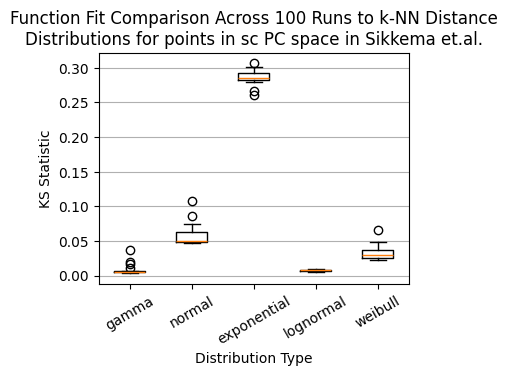

In [ ]:
import numpy as np
from scipy.spatial import KDTree
from scipy.stats import gamma, norm, expon, lognorm, weibull_min, kstest
import matplotlib.pyplot as plt

# Assuming X_ref is defined (randomly generating here for example purposes)
np.random.seed(100)  # For reproducibility
k = 5  # k-th nearest neighbor

# Candidate distributions
distributions = {
    'gamma': gamma,
    'normal': norm,
    'exponential': expon,
    'lognormal': lognorm,
    'weibull': weibull_min
}

# Storage for KS statistics over dimensions
ks_statistics = {dist_name: [] for dist_name in distributions.keys()}

# Loop through dimensions
for dim in range(4, 21):
    data = X_ref[:, :dim]  # Use the first `dim` dimensions
    tree = KDTree(data)
    distances, _ = tree.query(data, k=k+1)  # k+1 to exclude the point itself
    kth_distances = distances[:, k]  # k-th nearest neighbor distances

    results = []

    # Calculate KS statistics for each distribution
    for dist_name, dist in distributions.items():
        params = dist.fit(kth_distances)
        ks_stat, p_value = kstest(kth_distances, dist.cdf, args=params)
        ks_statistics[dist_name].append(ks_stat)
        results.append((dist_name, ks_stat, p_value, params))

    # Sort by KS statistic (lower is better)
    results.sort(key=lambda x: x[1])

    # Print results
    print(f"Distribution Fitness Comparison: dim={dim}")
    for dist_name, ks_stat, p_value, params in results:
        print(f"{dist_name}: KS Statistic={ks_stat:.3f}, p-value={p_value:.3f}, Parameters={params}")

    # Step 4: Plot all fits
    plt.figure(figsize=(4, 3))
    plt.hist(kth_distances, bins=100, density=True, alpha=0.6, color='gray', label='Distance Distribution')

    x = np.linspace(min(kth_distances), max(kth_distances), 1000)
    for dist_name, _, _, params in results:
        dist = distributions[dist_name]
        plt.plot(x, dist.pdf(x, *params), label=f'{dist_name} fit')

    plt.xlabel('Distance to k-th nearest neighbor')
    plt.ylabel('Density')
    plt.legend()
    plt.title('Fits of Different Functions to k-NN Distance\nDistributions for points in sc PC space in Sikkema et.al.')
    plt.savefig(f'Sikkema_dist_PC_{dim}.svg')

    plt.close()

# Step 5: Plot the results
plt.figure(figsize=(4, 3))
plt.boxplot([ks_statistics[dist_name] for dist_name in distributions.keys()],
            labels=distributions.keys())
plt.xlabel('Distribution Type')
plt.ylabel('KS Statistic')
plt.title('Function Fit Comparison Across 100 Runs to k-NN Distance\nDistributions for points in sc PC space in Sikkema et.al.')
plt.xticks(rotation=30)
plt.grid(axis='y')

plt.savefig('Sikkema_boxplot.svg')

# Display KS statistics over dimensions
for dist_name, stats in ks_statistics.items():
    print(f"{dist_name}: Mean KS Statistic over dimensions = {np.mean(stats):.3f}")

## Data 3

In [ ]:
!pip install scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
import os
import shutil
from scipy.io import mmread
import pandas as pd
import numpy as np
import scanpy as sc
from anndata import AnnData

In [ ]:
def read_zheng_2017(file_directory: str) -> pd.DataFrame:
    """
    Read the expression data for in a downloaded file directory.

    Args:
    ----
        file_directory: A downloaded and unzipped file directory.

    Returns
    -------
        A data frame containing single-cell gene expression count, with cell
        identification barcodes as column names and gene IDs as indices.
    """
    data = mmread(
        os.path.join(file_directory, "filtered_matrices_mex/hg19/matrix.mtx")
    ).toarray()
    genes = pd.read_table(
        os.path.join(file_directory, "filtered_matrices_mex/hg19/genes.tsv"),
        header=None,
    )
    barcodes = pd.read_table(
        os.path.join(file_directory, "filtered_matrices_mex/hg19/barcodes.tsv"),
        header=None,
    )
    return pd.DataFrame(
        data, index=genes.iloc[:, 0].values, columns=barcodes.iloc[:, 0].values
    )

In [ ]:
def preprocess_zheng_2017(download_path: str, n_top_genes: int) -> AnnData:
    """
    Preprocess expression data from Zheng et al. 2017.

    Args:
    ----
        download_path: Path containing the downloaded and unzipped file
            directories.
        n_top_genes: Number of most variable genes to retain.

    Returns
    -------
        An AnnData object containing single-cell expression data. The layer
        "count" contains the count data for the most variable genes. The X
        variable contains the total-count-normalized and log-transformed data
        for the most variable genes (a copy with all the genes is stored in
        .raw).
    """
    file_directory_dict = {
        "aml027_pre_transplant": ("aml027_pre_transplant_filtered_gene_bc_matrices"),
        "aml027_post_transplant": ("aml027_post_transplant_filtered_gene_bc_matrices"),
        "aml035_pre_transplant": ("aml035_pre_transplant_filtered_gene_bc_matrices"),
        "aml035_post_transplant": ("aml035_post_transplant_filtered_gene_bc_matrices"),
        "donor1_healthy": ("frozen_bmmc_healthy_donor1_filtered_gene_bc_matrices"),
        "donor2_healthy": ("frozen_bmmc_healthy_donor2_filtered_gene_bc_matrices"),
    }
    df_dict = {
        sample_id: read_zheng_2017(os.path.join(download_path, file_directory))
        for sample_id, file_directory in file_directory_dict.items()
    }
    gene_set_list = []
    for sample_id, df in df_dict.items():
        df = df.iloc[:, np.sum(df.values, axis=0) != 0]
        df = df.iloc[np.sum(df.values, axis=1) != 0, :]
        df = df.transpose()
        gene_set_list.append(set(df.columns))
        patient_id, condition = sample_id.split("_", 1)
        df["patient_id"] = patient_id
        df["condition"] = condition
        df_dict[sample_id] = df
    shared_genes = list(set.intersection(*gene_set_list))
    data_list = []
    meta_data_list = []
    for df in df_dict.values():
        data_list.append(df[shared_genes])
        meta_data_list.append(df[["patient_id", "condition"]])
    data = pd.concat(data_list)
    meta_data = pd.concat(meta_data_list)
    adata = AnnData(X=data.reset_index(drop=True), obs=meta_data.reset_index(drop=True))
    adata.layers["count"] = adata.X.copy()
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    adata.raw = adata
    sc.pp.highly_variable_genes(
        adata,
        flavor="seurat_v3",
        n_top_genes=n_top_genes,
        layer="count",
        subset=True,
    )
    adata = adata[adata.layers["count"].sum(1) != 0]  # Remove cells with all zeros.
    return adata

In [ ]:
ad = preprocess_zheng_2017("/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/data/Zheng 2017",
                           n_top_genes=10000000)

/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
sc.tl.pca(ad)

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [ ]:
X_ref = ad[ad.obs['condition'] == 'healthy'].obsm['X_pca']

Distribution Fitness Comparison: dim=4
lognormal: KS Statistic=0.029, p-value=0.001, Parameters=(np.float64(0.7602712057118644), 0.16718018128599443, np.float64(0.47391656599132503))
gamma: KS Statistic=0.029, p-value=0.001, Parameters=(np.float64(1.5889991287743266), np.float64(0.20917714049655944), np.float64(0.36821375055346905))
weibull: KS Statistic=0.037, p-value=0.000, Parameters=(np.float64(1.252729284883417), np.float64(0.2093916876111659), np.float64(0.6317244170918979))
exponential: KS Statistic=0.102, p-value=0.000, Parameters=(0.20945703843051922, 0.5848160538073989)
normal: KS Statistic=0.138, p-value=0.000, Parameters=(np.float64(0.7942730922379181), np.float64(0.5173496964759149))
Distribution Fitness Comparison: dim=5
lognormal: KS Statistic=0.023, p-value=0.022, Parameters=(np.float64(0.6781793427019778), 0.24394756124015346, np.float64(0.6373433155279523))
gamma: KS Statistic=0.034, p-value=0.000, Parameters=(np.float64(1.9713078441063216), np.float64(0.2963026720685

<ipython-input-54-5631f6071117>:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ks_statistics[dist_name] for dist_name in distributions.keys()],


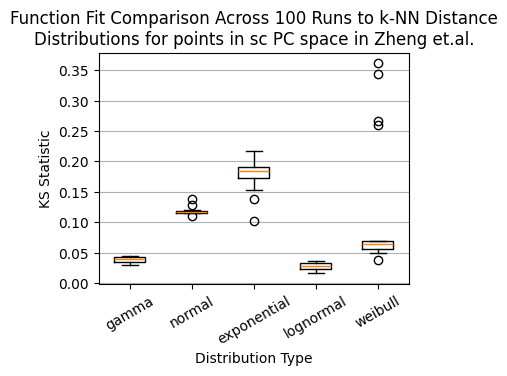

In [ ]:
import numpy as np
from scipy.spatial import KDTree
from scipy.stats import gamma, norm, expon, lognorm, weibull_min, kstest
import matplotlib.pyplot as plt

# Assuming X_ref is defined (randomly generating here for example purposes)
np.random.seed(100)  # For reproducibility
k = 5  # k-th nearest neighbor

# Candidate distributions
distributions = {
    'gamma': gamma,
    'normal': norm,
    'exponential': expon,
    'lognormal': lognorm,
    'weibull': weibull_min
}

# Storage for KS statistics over dimensions
ks_statistics = {dist_name: [] for dist_name in distributions.keys()}

# Loop through dimensions
for dim in range(4, 21):
    data = X_ref[:, :dim]  # Use the first `dim` dimensions
    tree = KDTree(data)
    distances, _ = tree.query(data, k=k+1)  # k+1 to exclude the point itself
    kth_distances = distances[:, k]  # k-th nearest neighbor distances

    results = []

    # Calculate KS statistics for each distribution
    for dist_name, dist in distributions.items():
        params = dist.fit(kth_distances)
        ks_stat, p_value = kstest(kth_distances, dist.cdf, args=params)
        ks_statistics[dist_name].append(ks_stat)
        results.append((dist_name, ks_stat, p_value, params))

    # Sort by KS statistic (lower is better)
    results.sort(key=lambda x: x[1])

    # Print results
    print(f"Distribution Fitness Comparison: dim={dim}")
    for dist_name, ks_stat, p_value, params in results:
        print(f"{dist_name}: KS Statistic={ks_stat:.3f}, p-value={p_value:.3f}, Parameters={params}")

    # Step 4: Plot all fits
    plt.figure(figsize=(4, 3))
    plt.hist(kth_distances, bins=100, density=True, alpha=0.6, color='gray', label='Distance Distribution')

    x = np.linspace(min(kth_distances), max(kth_distances), 1000)
    for dist_name, _, _, params in results:
        dist = distributions[dist_name]
        plt.plot(x, dist.pdf(x, *params), label=f'{dist_name} fit')

    plt.xlabel('Distance to k-th nearest neighbor')
    plt.ylabel('Density')
    plt.legend()
    plt.title('Fits of Different Functions to k-NN Distance\nDistributions for points in sc PC space in Zheng et.al.')
    plt.savefig(f'Zheng_dist_PC_{dim}.svg')

    plt.close()

# Step 5: Plot the results
plt.figure(figsize=(4, 3))
plt.boxplot([ks_statistics[dist_name] for dist_name in distributions.keys()],
            labels=distributions.keys())
plt.xlabel('Distribution Type')
plt.ylabel('KS Statistic')
plt.title('Function Fit Comparison Across 100 Runs to k-NN Distance\nDistributions for points in sc PC space in Zheng et.al.')
plt.xticks(rotation=30)
plt.grid(axis='y')

plt.savefig('Zheng_boxplot.svg')

# Display KS statistics over dimensions
for dist_name, stats in ks_statistics.items():
    print(f"{dist_name}: Mean KS Statistic over dimensions = {np.mean(stats):.3f}")